# procedure - F simulacion del experimento ral


We simulate the exit considering that the SLM is not ideal but is considering the performance of a real SLM.

## Load

In [1]:
from py_pol.jones_matrix import Jones_matrix
from py_pol.jones_vector import Jones_vector

In [2]:
from slm import np, sp, plt, um, mm, degrees

from slm.LCD_jones_matrices import LCD_jones_matrices, get_fields_gl, get_LUT_phases
from slm.LCD_models import LCD_kopin

number of processors: 8


In [3]:
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.utils_drawing import draw2D

number of processors: 8


In [24]:
from diffractio.vector_fields_XY import Vector_field_XY

In [4]:
LCD_model=LCD_kopin

In [5]:
LCD_experiment = LCD_jones_matrices(LCD_model)
LCD_jones = LCD_experiment.DC_to_pypol()

## Get _ mask

In [6]:
data=np.load('best_phase_angles_kopin.npz')
angles_phase=data['angles']
print(angles_phase/degrees)

[ 52.04937572  67.03487887 109.02981302  28.22204403]


In [7]:
data=np.load("LUT_phases.npz")
phases = data['phases']
gl = data['gl']

In [8]:
x=np.linspace(-100,100,128)
y=np.linspace(-100,100,128)
wavelength=0.6328*um

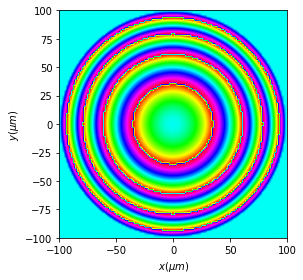

In [9]:
focal=2*mm
t_mask=Scalar_mask_XY(x,y,wavelength)
t_mask.lens(r0=(0,0), radius=100*um, focal=focal)
t_mask.draw('phase');

t_shape=t_mask.u.shape
t_length=t_shape[0]*t_shape[1]


In [10]:
LUT_phases=get_LUT_phases(phases, gl,np.angle(t_mask.u))
SLM_jones=LCD_jones[LUT_phases]

## Polarization elements

In [11]:
v0=[1/np.sqrt(2),-1j/np.sqrt(2)]

source = Jones_vector()
source.from_components(v0, length=t_length, shape=t_shape);

In [12]:
pol1 = Jones_matrix('m1')
pol1.diattenuator_linear(
    p1=1, p2=0, azimuth=angles_phase[0], length=t_length, shape=t_shape)

pol2 = Jones_matrix('m2')
pol2.retarder_linear(
    R=90 * degrees, azimuth=angles_phase[1], length=t_length, shape=t_shape)

pol3 = Jones_matrix('m3')
pol3.retarder_linear(
    R=90 * degrees, azimuth=angles_phase[2], length=t_length, shape=t_shape)

pol4 = Jones_matrix('m4')
pol4.diattenuator_linear(
    p1=1, p2=0, azimuth=angles_phase[3], length=t_length, shape=t_shape)

polarizers = (pol1, pol2, pol3, pol4)

In [13]:
pol_xy_z0=pol4*pol3*SLM_jones*pol2*pol1*source

In [14]:
pol_xy_z0[0,0]

m4 * m3 * SLM_picked * m2 * m1 * E_picked = 
[-0.372-0.100j ]   
[-0.200-0.054j ]   

The intensity of m4 * m3 * SLM_picked * m2 * m1 * E is (a.u.):
The mean value is 0.19139375533249664 +- 0.00010841656944120337


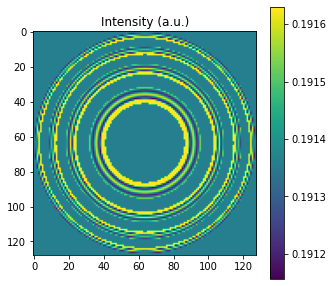

In [15]:
pol_xy_z0.parameters.intensity(draw=True);

The elctric field components of m4 * m3 * SLM_picked * m2 * m1 * E are (V/m):
The mean value of param Ex (V/m) is (-0.20459558577542414-0.16650914851022536j) +- 0.281084900510555
The mean value of param Ey (V/m) is (-0.10980455913912454-0.0893639204164712j) +- 0.15085566711641918


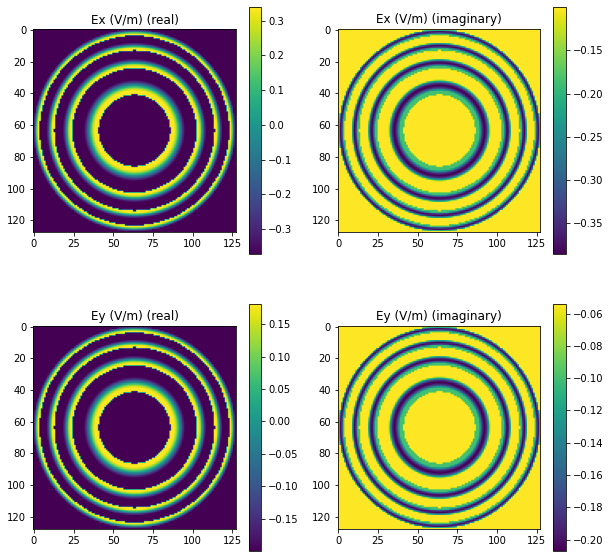

In [23]:
Ex,Ey=pol_xy_z0.parameters.components(draw=True, verbose=False);

## Propagación

### Escalar

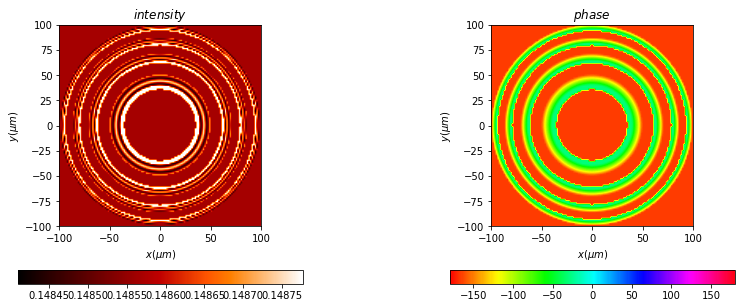

In [30]:
uxy_0=Scalar_mask_XY(x,y,wavelength)
uxy_0.u=Ex
uxy_0.draw('field');

In [43]:
x_focus=40*um
u_xy=uxy_0.RS(z=focal)
u_xy.cut_resample([-x_focus,x_focus], [-x_focus,x_focus])

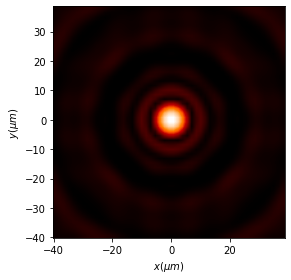

In [51]:
u_xy.draw(logarithm=2);

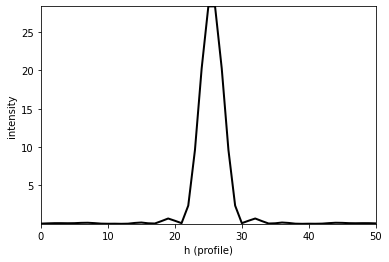

In [52]:
u_xy.draw_profile([-100,0],[100,0], order=2);

(0.0, 1.0)

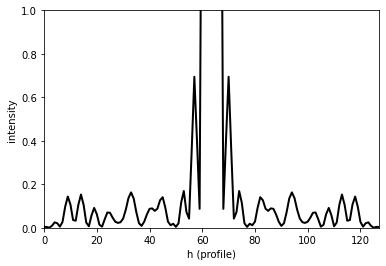

In [46]:
u_xy_z.draw_profile([-100,0],[100,0], order=2);
plt.ylim(0,1)

### Vectorial

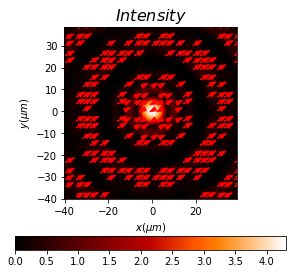

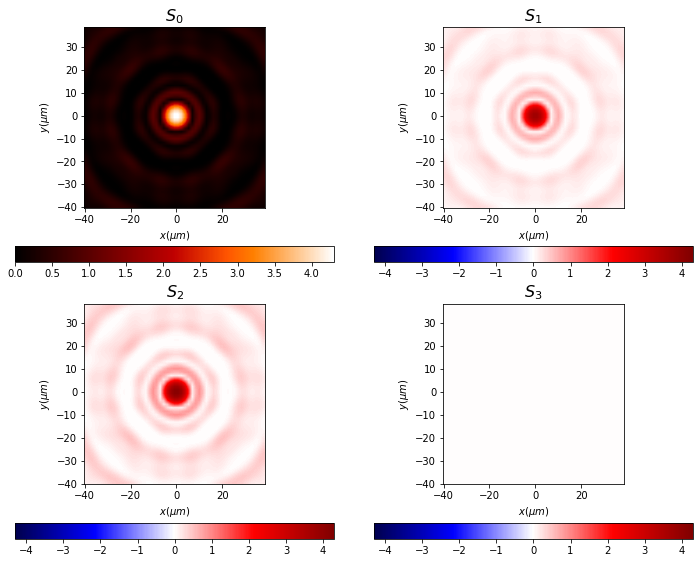

In [50]:
field_0 = Vector_field_XY(x, y, wavelength)
field_0.Ex = Ex 
field_0.Ey = Ey 

field_1 = field_0.RS(z=focal)
field_1.cut_resample([-x_focus,x_focus], [-x_focus,x_focus])


field_1.draw(kind='ellipses', color_line='r',
             num_ellipses=(21,21),logarithm=2)
field_1.draw('stokes', logarithm=2)